# Accessing FHIR resources

This tutorial shows two ways to access FHIR resources from a FHIR server set up with InterSystems IRIS-Health, the first using the Python package fhirpy and the second using HTTP requests. I recommend using the first (fhirpy) and the tutorial goes into much more detail here. However, if you are very familiar using HTTP requests or want to access from another application that supports HTTP requests, feel free to refer to the second method. 

Finally - note that for population level data, you might be better off creating relational tables based on the FHIR data. Lucky for you, there is the main demo includes a [tutorial](../Demo/1-Using-FHIR-SQL-Builder.ipynb) on how to do this. 

**For this tutorial, I am assuming you have set up the FHIR Server using the iris-fhir-template on github, as shown in the [main demo](../Demo/0-FHIR-Server-setup.md)** - There are other ways to set up a FHIR server and feel free to use them, you will just have to check the FHIR server location (URL) and system credentials.

## Using fhirpy

fhirpy can be installed through PyPI (`pip install fhirpy`) but hopefully it should have already been installed with the requirements.txt. 

fhirpy can be used synchronously (`SyncFHIRClient`) or asynchronously (`AyncFHIRClient`), don't worry too much about this unless you have a reason to work asynchronously. 

The steps for using fhirpy can be roughly broken down into: 
1. Create link to server
2. Search for resource(s)
3. Parse data

#### Import Dependencies

In [29]:
from fhirpy import SyncFHIRClient, AsyncFHIRClient ## Used for created a link to the FHIR server
import base64 # Used for encoding the credentials

### Create link to Server
This creates a bridge to the client server allowing us to query the FHIR server and fetch resources using [fhirpy](https://pypi.org/project/fhirpy/) methods. This bridge means we don't have to keep typing out the server location or authorisation, we can just repeatedly query the client bridge created.

#### Encode credentials 
Note that this method is vulnerable and should be replaced with a more secure method in production code.

In [30]:
username = "_System"
password = "SYS"
credentials = f"{username}:{password}".encode("utf-8")
encoded = base64.b64encode(credentials).decode("utf-8")

In [31]:
## Create client using the server location - in our case its held locally on port 8080, and authorization using our encoded credentials. 
client = SyncFHIRClient("http://localhost:32783/fhir/r4/", authorization=  f"Basic {encoded}")

### Example Query

To get a specific type of resource, we can query the resource endpoint using `client.resources({resource_type_endpoint})` method. For example: 

In [32]:
resources=  client.resources("Patient").fetch()
print(resources)
print(f'\n\nThe query has returned {len(resources)} patient resources\n')

[<SyncFHIRResource Patient/4>, <SyncFHIRResource Patient/5>, <SyncFHIRResource Patient/2>, <SyncFHIRResource Patient/3>, <SyncFHIRResource Patient/6>, <SyncFHIRResource Patient/37>, <SyncFHIRResource Patient/2373>, <SyncFHIRResource Patient/2372>, <SyncFHIRResource Patient/2370>, <SyncFHIRResource Patient/2371>, <SyncFHIRResource Patient/2374>, <SyncFHIRResource Patient/2407>, <SyncFHIRResource Patient/4977>, <SyncFHIRResource Patient/4985>, <SyncFHIRResource Patient/5041>]


The query has returned 15 patient resources



In [39]:
for resource in resources:
    print(resource.name)

[{'use': 'official', 'family': 'Frami345', 'given': ['Kallie862'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': "O'Hara248", 'given': ['Kallie862'], 'prefix': ['Mrs.']}]
[{'use': 'official', 'family': 'Jast432', 'given': ['Frankie174'], 'prefix': ['Mr.']}]
[{'use': 'official', 'family': "O'Hara248", 'given': ['Carroll471'], 'prefix': ['Mr.']}]
[{'use': 'official', 'family': 'Rohan584', 'given': ['Gabriele201']}]
[{'use': 'official', 'family': 'Davis923', 'given': ['Lean294'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': 'Tillman293', 'given': ['Lean294'], 'prefix': ['Mrs.']}]
[{'use': 'official', 'family': 'Hettinger594', 'given': ['Margie619'], 'prefix': ['Ms.']}]
[{'use': 'official', 'family': 'Frami345', 'given': ['Kallie862'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': "O'Hara248", 'given': ['Kallie862'], 'prefix': ['Mrs.']}]
[{'use': 'official', 'family': 'Jast432', 'given': ['Frankie174'], 'prefix': ['Mr.']}]
[{'use': 'official', 'family': "O'Hara248", 'given': ['Ca

### Adding search parameters
We can add search parameters into our fetch methods, for example if we want to find a specific patient we could query by their first name:

In [40]:
frankies =  client.resources("Patient").search(name="Frankie").fetch()

for frankie in frankies: 
    print(john.id,"\n", john.name,"\n\n")

5 
 [{'use': 'official', 'family': 'Jast432', 'given': ['Frankie174'], 'prefix': ['Mr.']}] 


2372 
 [{'use': 'official', 'family': 'Jast432', 'given': ['Frankie174'], 'prefix': ['Mr.']}] 




You can see that this is a fuzzy search - neither of the results are of a man called John - instead patient 12724 has the surname "Johns" and patient 25319 has the maiden surname "Johnson".

We could be more specific in our original search:

In [163]:
tish =  client.resources("Patient").search(family="Lemke", given="Tish", birthDate="1975-05-26").fetch()
print(tish)

[<SyncFHIRResource Patient/25319>]


We can add many search parameters to our search which we will come across later on. For every resource type, there is a list of search parameters on the FHIR documentation pages, for example, we can access [patient search parameters](https://build.fhir.org/patient-search.html). 

Lets see if any of our *fictional* patients are deceased:

In [167]:
deceased = client.resources("Patient").search(deceased=True).fetch()
deceased

[<SyncFHIRResource Patient/1>,
 <SyncFHIRResource Patient/2>,
 <SyncFHIRResource Patient/1496>,
 <SyncFHIRResource Patient/3783>,
 <SyncFHIRResource Patient/3097>,
 <SyncFHIRResource Patient/5176>,
 <SyncFHIRResource Patient/4897>,
 <SyncFHIRResource Patient/15255>,
 <SyncFHIRResource Patient/25707>,
 <SyncFHIRResource Patient/31742>,
 <SyncFHIRResource Patient/34258>,
 <SyncFHIRResource Patient/35617>,
 <SyncFHIRResource Patient/37195>,
 <SyncFHIRResource Patient/38878>,
 <SyncFHIRResource Patient/42531>,
 <SyncFHIRResource Patient/43417>,
 <SyncFHIRResource Patient/46023>,
 <SyncFHIRResource Patient/53790>,
 <SyncFHIRResource Patient/59112>,
 <SyncFHIRResource Patient/63822>]

See how we can add search parameters to improve our search? For now though, lets return to the patient we found earlier and find out a bit more about her. 

Our searches have so far returned lists of resources that match, even if there is only one match. For simplicity, I am going to extract the patient resource from the list of matches:

In [168]:
tish = tish[0] # set tish to be the first (and only) resource returned by our search  

## Parsing the resource

Once we have our resource, we can find the data we need from the resource. The different parts of the resource can be accessed as properties: 

Please note our subject for this part, Tish Lemke, is completely fictional. The data is synthetic and generated using [Synthea](https://synthetichealth.github.io/synthea/).


In [169]:
print("ID: ", tish.id)
print("Date of Birth: ", tish.birthDate)

ID:  25319
Date of Birth:  1978-06-25


In [170]:
## Some properties are more complex than others: 
print(tish.name)

[{'use': 'official', 'family': 'Lemke', 'given': ['Tish'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': 'Johnston', 'given': ['Tish'], 'prefix': ['Mrs.']}]


In [171]:
print("LastName,FirstName: ", f"{tish.name[0].family},{tish.name[0].given[0]}") 

LastName,FirstName:  Lemke,Tish


We can see all the data in the resource with: 

In [152]:
tish.serialize() ## The result is the resource in Python Dictionary format (essentially JSON format)

{'resourceType': 'Patient',
 'id': '25319',
 'text': {'status': 'generated',
  'div': '<div xmlns="http://www.w3.org/1999/xhtml">Generated by <a href="https://github.com/synthetichealth/synthea">Synthea</a>.Version identifier: synthea-java .   Person seed: 7070811051044420006  Population seed: 1597764932523</div>'},
 'extension': [{'url': 'http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName',
   'valueString': 'Lisabeth Zboncak'},
  {'url': 'http://hl7.org/fhir/StructureDefinition/patient-birthPlace',
   'valueAddress': {'city': 'Nahant',
    'state': 'Massachusetts',
    'country': 'US'}},
  {'url': 'http://synthetichealth.github.io/synthea/disability-adjusted-life-years',
   'valueDecimal': 0.07941261291993779},
  {'url': 'http://synthetichealth.github.io/synthea/quality-adjusted-life-years',
   'valueDecimal': 40.92058738708006}],
 'identifier': [{'system': 'https://github.com/synthetichealth/synthea',
   'value': 'e362ce59-b198-4296-b01e-109fa6b44fe5'},
  {'type': {'c

In [54]:
## As a challenge - see if you can find Tish's phone number using . properties! 

## Other resources

While the patient resource is vital for knowing the personal details of the patient in focus, clinical information is kept in other resources. There are many supported resources - the [Official FHIR resource list](https://build.fhir.org/resourcelist.html) has 159, each with a specific role. Many of these are adminstrative and handle orgnisations, payments and general management, but a subset might be useful for clinical means: 

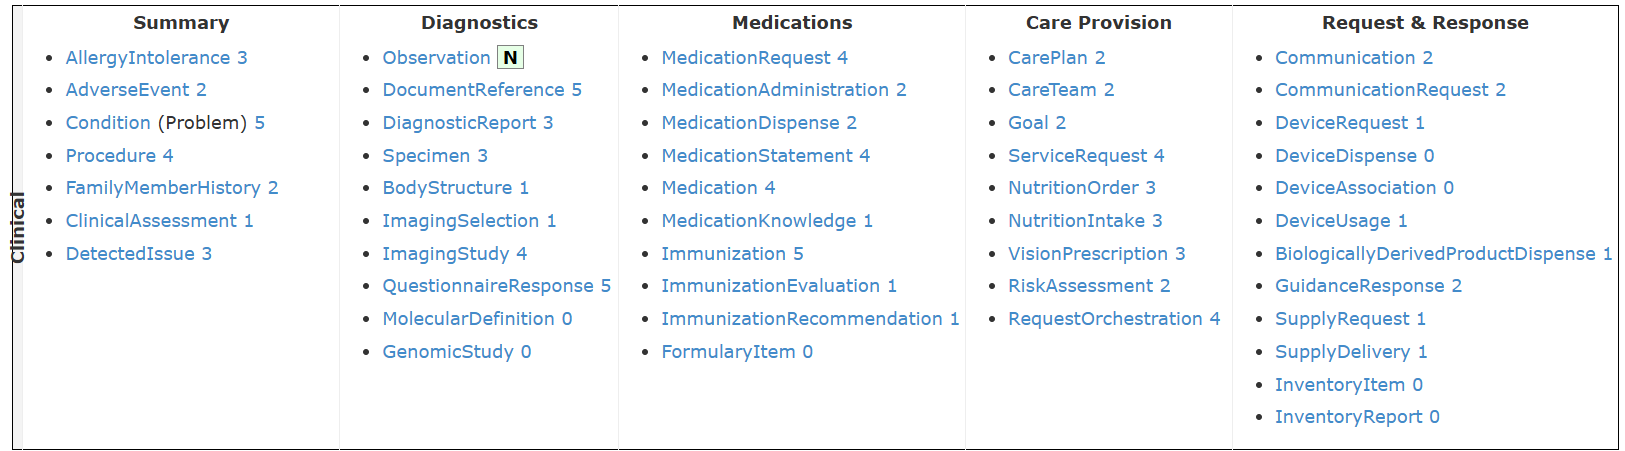

When using a new resource, I highly recommend using the .serialize() method to look at the resource structure and help you locate the data you need! 

We can find information about our (*fictional*) patient using her id:   

In [154]:
patient_id = tish.id

## Here I am adding a 'sort' method to the search to return the results in order of most recent. 
## The '-' character in the sort search parameter means reverse order (in this case ascending, or most recent first). 
## The search parameters have different syntax to the resource serialization. 
## To find search parameters for a specific resource, look on the build.fhir.org documneation
## see https://build.fhir.org/condition-search.html for condition resource search parameters
conditions = client.resources("Condition").search(patient=patient_id).sort("-recorded-date").fetch()

print(conditions)

[<SyncFHIRResource Condition/31443>, <SyncFHIRResource Condition/27077>, <SyncFHIRResource Condition/27055>, <SyncFHIRResource Condition/27073>, <SyncFHIRResource Condition/27074>, <SyncFHIRResource Condition/27075>, <SyncFHIRResource Condition/27076>, <SyncFHIRResource Condition/27048>, <SyncFHIRResource Condition/27049>, <SyncFHIRResource Condition/27050>, <SyncFHIRResource Condition/27051>, <SyncFHIRResource Condition/27052>, <SyncFHIRResource Condition/27053>, <SyncFHIRResource Condition/27054>, <SyncFHIRResource Condition/27013>, <SyncFHIRResource Condition/27005>, <SyncFHIRResource Condition/27001>, <SyncFHIRResource Condition/26492>, <SyncFHIRResource Condition/26443>, <SyncFHIRResource Condition/26426>, <SyncFHIRResource Condition/26387>, <SyncFHIRResource Condition/25323>]


In [155]:
## Again, we can view the full resource using: 
conditions[0].serialize()

{'resourceType': 'Condition',
 'id': '31443',
 'clinicalStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-clinical',
    'code': 'resolved'}]},
 'verificationStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-ver-status',
    'code': 'confirmed'}]},
 'code': {'coding': [{'system': 'http://snomed.info/sct',
    'code': '301011002',
    'display': 'Escherichia coli urinary tract infection'}],
  'text': 'Escherichia coli urinary tract infection'},
 'subject': {'reference': 'Patient/25319'},
 'encounter': {'reference': 'Encounter/31442'},
 'onsetDateTime': '2020-07-31T05:02:07-04:00',
 'abatementDateTime': '2020-08-07T05:02:07-04:00',
 'recordedDate': '2020-07-31T05:02:07-04:00',
 'meta': {'lastUpdated': '2025-09-19T14:00:29Z', 'versionId': '1'}}

In [156]:
## Or iterate through the first 5 results: 
for condition in conditions[:5]: 
    print(f'id: {condition.id} , patient: {condition.subject.reference}')
    print("Date: ", condition.recordedDate)
    print("Condition: ", condition.code.text, "\n") 
    

id: 31443 , patient: Patient/25319
Date:  2020-07-31T05:02:07-04:00
Condition:  Escherichia coli urinary tract infection 

id: 27077 , patient: Patient/25319
Date:  2020-03-12T05:41:07-04:00
Condition:  Acute pulmonary embolism (disorder) 

id: 27055 , patient: Patient/25319
Date:  2020-03-04T04:41:07-05:00
Condition:  COVID-19 

id: 27073 , patient: Patient/25319
Date:  2020-03-04T04:41:07-05:00
Condition:  Pneumonia (disorder) 

id: 27074 , patient: Patient/25319
Date:  2020-03-04T04:41:07-05:00
Condition:  Hypoxemia (disorder) 



Note each resource has an ID value, this is not the same as the patient ID! 

We can do the same with other resources: 

In [158]:
procedures =  client.resources("Procedure").search(patient=patient_id).fetch()
print([f'{procedure.code.text}' for procedure in procedures])

print('\n\n')

['Standard pregnancy test', 'Ultrasound scan for fetal viability', 'Counseling for termination of pregnancy', 'Induced termination of pregnancy', 'Pregnancy termination care', 'Physical exam following abortion', 'Depression screening', 'Standard pregnancy test', 'Ultrasound scan for fetal viability', 'Evaluation of uterine fundal height', 'Auscultation of the fetal heart', 'Blood typing, RH typing', 'Hemoglobin / Hematocrit / Platelet count', 'Hepatitis B Surface Antigen Measurement', 'Human immunodeficiency virus antigen test', 'Chlamydia antigen test', 'Gonorrhea infection test', 'Syphilis infection test', 'Urine culture', 'Cytopathology procedure, preparation of smear, genital source', 'Urine screening test for diabetes', 'Hepatitis C antibody test', 'Rubella screening', 'Measurement of Varicella-zoster virus antibody', 'Skin test for tuberculosis', 'Urine protein test', 'Physical examination of mother', 'Evaluation of uterine fundal height', 'Auscultation of the fetal heart', 'Scre

There might be a particular value we are interested in. For example, maybe we want to track how a patient's weight has changed over time. Here we can use the coding systems to search for a particular category of resource. Here, I've looked up the code for patient weight from https://www.findacode.com and used this code (29463-7) as a search parameter:

In [159]:
observations =  client.resources("Observation").search(patient=patient_id, code="29463-7").sort("-date").fetch()
print(f'The search returned {len(observations)} results!')
print("Resource structure: ")
observations[0].serialize()

The search returned 16 results!
Resource structure: 


{'resourceType': 'Observation',
 'id': '31426',
 'status': 'final',
 'category': [{'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/observation-category',
     'code': 'vital-signs',
     'display': 'vital-signs'}]}],
 'code': {'coding': [{'system': 'http://loinc.org',
    'code': '29463-7',
    'display': 'Body Weight'}],
  'text': 'Body Weight'},
 'subject': {'reference': 'Patient/25319'},
 'encounter': {'reference': 'Encounter/31423'},
 'effectiveDateTime': '2020-07-05T05:02:07-04:00',
 'issued': '2020-07-05T05:02:07.383-04:00',
 'valueQuantity': {'value': 55.8,
  'unit': 'kg',
  'system': 'http://unitsofmeasure.org',
  'code': 'kg'},
 'meta': {'lastUpdated': '2025-09-19T14:00:28Z', 'versionId': '1'}}

In [160]:
datapoints = []
for observation in observations: 
    point = (observation.effectiveDateTime, observation.valueQuantity.value, observation.valueQuantity.unit)
    datapoints.append(point)
    print(point) 


('2020-07-05T05:02:07-04:00', 55.8, 'kg')
('2020-03-13T05:41:07-04:00', 55.8, 'kg')
('2020-03-12T05:41:07-04:00', 55.8, 'kg')
('2020-03-11T05:41:07-04:00', 55.8, 'kg')
('2020-03-10T05:41:07-04:00', 55.8, 'kg')
('2020-03-09T05:41:07-04:00', 55.8, 'kg')
('2020-03-08T05:41:07-04:00', 55.8, 'kg')
('2020-03-07T04:41:07-05:00', 55.8, 'kg')
('2020-03-06T04:41:07-05:00', 55.8, 'kg')
('2020-03-05T04:41:07-05:00', 55.8, 'kg')
('2020-03-04T04:41:07-05:00', 55.8, 'kg')
('2020-03-04T04:02:07-05:00', 55.8, 'kg')
('2018-07-01T05:02:07-04:00', 55.8, 'kg')
('2015-09-13T05:02:07-04:00', 55.8, 'kg')
('2014-11-09T04:02:07-05:00', 55.8, 'kg')
('2012-09-09T05:02:07-04:00', 55.8, 'kg')


Now somewhat unexpectedly, the patient has stayed at exactly the same weight for 8 years and across two pregnancies! There are limits to the realism of synthetic data... 

I was planning to demonstrate making a basic graph of weight-vs-time, but on second thoughts, I think you can use your imagination! However, you can hopefully see how you can use FHIR resources to build a picture of a patient's medical history. 

# Querying the FHIR Server with HTTP requests

While fhirpy can make certain syntax easier, we can also query the server with standard HTTP requests, this is the standard way to query FHIR servers from different applications and may be more familiar to people who have used FHIR a lot. 


In [26]:
import requests
from requests.auth import HTTPBasicAuth

## Credentials
username = "_System"
password = "SYS"

## FHIR server location
baseURL = "http://localhost:32783/fhir/r4/"

headers ={    "Accept": "application/fhir+json"}


endpoint = "Patient"


res = requests.get(baseURL+endpoint, headers=headers, auth=HTTPBasicAuth(username, password))
print(res)

<Response [200]>


Response 200 means we have successfully recieved the expected response, in this case, it will be a bundle of all patient resources. We can access this bundle using res.json(). This can be quite annoying to parse, but the data is there! For example: 

In [196]:
#print(res.json())
data = res.json() 

for entry in data.get("entry", [])[:10]: ## Get the first 10 entries
    patient = entry.get('resource', {}) ## Get the patient resource
    print(patient.get('id'), patient.get('name'), patient.get('gender')) ## Print the patient info


5 [{'use': 'official', 'family': 'Runolfsdottir', 'given': ['Sudie'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': 'Buckridge', 'given': ['Sudie'], 'prefix': ['Mrs.']}] female
3 [{'use': 'official', 'family': 'Mann', 'given': ['Suzann'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': 'Pollich', 'given': ['Suzann'], 'prefix': ['Mrs.']}] female
4 [{'use': 'official', 'family': 'Paucek', 'given': ['Stewart'], 'prefix': ['Mr.']}] male
1 [{'use': 'official', 'family': 'Baumbach', 'given': ['Sung']}] female
2 [{'use': 'official', 'family': 'Larson', 'given': ['Stewart']}] male
6 [{'use': 'official', 'family': 'Murazik', 'given': ['Sydney'], 'prefix': ['Mr.']}] male
7 [{'use': 'official', 'family': 'Cronin', 'given': ['Stuart'], 'prefix': ['Mr.']}] male
1371 [{'use': 'official', 'family': 'Schinner', 'given': ['Synthia']}] female
1759 [{'use': 'official', 'family': 'Dickens', 'given': ['Tamica'], 'prefix': ['Mrs.']}, {'use': 'maiden', 'family': 'Hamill', 'given': ['Tamica'], 'prefix': [

We can add search parameters to the URL we are quering, for example: 

In [211]:

search_params = "?name=Tish"

url = baseURL + endpoint+ "/"+ search_params
print(url)
res = requests.get(url, headers=headers, auth=HTTPBasicAuth(username, password))
print(res)

http://localhost:8080/csp/healthshare/demo/fhir/r4/Patient/?name=Tish
<Response [200]>


In [212]:
res.json()

{'resourceType': 'Bundle',
 'id': 'fda900e2-992d-11f0-a420-361c5f389c7a',
 'type': 'searchset',
 'timestamp': '2025-09-24T10:05:25Z',
 'total': 1,
 'link': [{'relation': 'self',
   'url': 'http://localhost:8080/csp/healthshare/demo/fhir/r4/Patient?name=Tish'}],
 'entry': [{'fullUrl': 'http://localhost:8080/csp/healthshare/demo/fhir/r4/Patient/25319',
   'resource': {'resourceType': 'Patient',
    'id': '25319',
    'text': {'status': 'generated',
     'div': '<div xmlns="http://www.w3.org/1999/xhtml">Generated by <a href="https://github.com/synthetichealth/synthea">Synthea</a>.Version identifier: synthea-java .   Person seed: 7070811051044420006  Population seed: 1597764932523</div>'},
    'extension': [{'url': 'http://hl7.org/fhir/StructureDefinition/patient-mothersMaidenName',
      'valueString': 'Lisabeth Zboncak'},
     {'url': 'http://hl7.org/fhir/StructureDefinition/patient-birthPlace',
      'valueAddress': {'city': 'Nahant',
       'state': 'Massachusetts',
       'country': '

An advantage of using HTTP requests is that there is much better documentation and examples on using search parameters, making complex queries easier to create. 

Disadvantages of HTTP requests include that you have to include the headers and authentication information each time you make a request, and the process for creating simple queries is much more complicated. The bundle output is also complete in the JSON (or python dict) format, making it harder to parse than lists of fhirpy `<SyncFHIRResource>` object. 

Depending on experience and usage, you may prefer one over the other, but so feel free to use whichever. 